In [1]:
import sys
!{sys.executable} -m pip install -r requirements.txt

In [2]:
%load_ext autoreload
%autoreload 2

%run './setup_notebook'

# Load Vehicles

Meta data about vehicles is stored in the datalake PG database. 

Here we use pg to connect and read the entire vehicle table. 

The schema for the database is in the `db_structure/tables.sql` file

In [3]:
with pg.connect("postgresql://cvts@10.100.0.50:5432/datalake") as conn:
    vehicles = pd.read_sql("select * from vehicles;", conn)
vehicles.head()

,vehicle_id,vehicle_type_id,vehicle_id_string
0,99379,1,QvpbGz/un3z4vYYaDaouYw==
1,99380,2,AMgGqb8IV9fVCO9iu1H0mA==
2,99381,3,Sgl6sbxD32WV9ZhhKrqymw==
3,99382,1,Rktn2b+HN1DRwBJVUturOw==
4,99383,1,MEB0CyGSavgpmDMMd9J3+A==


Now we pick a random (first) vehicle and look at it

In [4]:
veh_1 = vehicles.iloc[0]
veh_1.vehicle_id

99379

## Load GPS Traces
Now we get the vehicle's entire trace of locations across all of April

<AxesSubplot:>

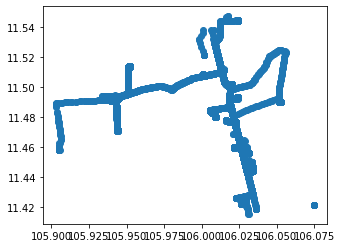

In [5]:
filename = f'/mnt/data_lake/2020/04/vehicle_{veh_1.vehicle_id}.zip'
df = pd.read_csv(filename)
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['x'], df['y']))
gdf.plot()

In [6]:
gdf.head()

,datetime,speed,x,y,heading,geometry
0,1585719622,0.0,106.075008,11.421313,0.0,POINT (106.07501 11.42131)
1,1585719638,0.0,106.075008,11.421313,0.0,POINT (106.07501 11.42131)
2,1585719651,0.0,106.075008,11.421313,0.0,POINT (106.07501 11.42131)
3,1585719671,0.0,106.075008,11.421313,0.0,POINT (106.07501 11.42131)
4,1585719686,0.0,106.075008,11.421313,0.0,POINT (106.07501 11.42131)
